![Pandemonium](https://eclecticlight.co/wp-content/uploads/2019/02/martinpandemonium.jpg)

# Text Data (PCA)

This week we will explore textual data, another type of **sequential data**. Rather than having sequences of numbers, such as temperature or precipitation, we have sequences of letters and symbols. 

This PCA acts as your homework for the week and prepares you for the Tuesday ICA. To get started, read this "lecture":


## Understanding Text as Data: From Simple Statistics to ChatGPT

Every day, you interact with AI systems that process text - chatbots answer your questions, email filters catch spam, and search engines find your content. These modern marvels all build upon fundamental techniques for processing text as data. 

But text isn't like other data types - it's wonderfully messy, deeply contextual, and _uniquely human_.

### What Makes Text Different?

Unlike numerical data (temperatures, prices, populations) or categorical data (colors, product types, ratings), text data presents unique challenges:

1. **Ambiguity**: The phrase "I'm down" could mean "I'm feeling sad" or "I'm willing to participate" - humans use context to understand which is meant.

2. **Structure and Unstructure**: Text can be highly structured (legal documents, formal reports) or completely unstructured (tweets, text messages) - often mixing both within the same document.

3. **Multiple Levels of Meaning**: Text carries information at many levels:
   - Characters and their patterns (spelling, language detection)
   - Words and their relationships (grammar, meaning)
   - Sentences and their structure (logic, narrative)
   - Documents and their organization (themes, purpose)

4. **Cultural and Temporal Context**: "This slaps!" means something very different in 2024 than it would have in 1984.

### Familiar Data Challenges in New Forms

Despite these unique aspects, text analysis shares many challenges with traditional data processing:

- **Noise**: Just as sensor data has interference, text has typos, slang, and non-standard spellings
- **Missing Data**: Like empty cells in a spreadsheet, text can have implied but unstated information
- **Outliers**: Unusual language usage, like ALL CAPS or repeated letters ("sooooo good"), parallels numerical outliers
- **Scale**: Processing millions of documents presents similar computational challenges to analyzing millions of transactions

### From Basic Stats to Modern AI

The journey from basic text processing to modern language AI is fascinating:
- Early systems counted word frequencies - still crucial for tasks like spam detection
- Vector representations helped computers measure text similarity - powering search engines
- Statistical patterns in language structure led to better machine translation
- Modern transformer models (powering tools like ChatGPT) build on all these foundations while adding powerful new capabilities

Understanding these fundamentals isn't just historical curiosity - it's essential for:
- Knowing when to trust (or question) AI language systems
- Building better text processing tools
- Understanding why language AI sometimes fails in surprising ways
- Appreciating how human language differs from computer processing

In this assignment, we'll explore these foundations, seeing how computers "understand" text one step at a time. While modern AI systems may seem magical, they're built on these same basic principles - just at a much larger scale. By understanding how computers process text at a fundamental level, you'll be better equipped to work with, build with, and critically evaluate modern language AI systems.

Let's begin our exploration of text as data!

_____________________

Below are 5 problems. I designed these to all use the same library: NLTK. Go [here](https://www.nltk.org) and read a bit about it. 

_____

# Problem 1: Obtaining Text Data from NLTK and IDA (12)

While you might have your own text data for a real world problem, NLTK provides many datasets for you. This is analogous to the datasets provided by Seaborn, Pandas and Scikit-Learn. 

For text data, a single dataset is referred to as a "corpus", which has the plural "corpora". To see what NLTK provides, [go here](https://www.nltk.org/nltk_data/).

First, make sure you can get this code to work on your computer. You may need to install some libraries. [Read this](https://www.nltk.org/data.html) to understand what this does. 

In [3]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg, stopwords
from nltk.probability import FreqDist
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from string import punctuation

nltk.download('gutenberg')
nltk.download('punkt')
# note code failed the first time and I had to download punkt_tab
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

If you are interested in others within Gutenberg, you can use this:

In [4]:
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

Your task for this problem is to do IDA on these datasets. As you are now becoming an expert in data science, I will provide no further instructions! Be sure to use at least three corpora and, at a minimum, inspect the first few paragraphs from the copora you select. Show all of your work and discuss the IDA you did.

Here is some code so that you can see a bit how NLTK works:

In [5]:
def perform_ida(text_file):
    # Load text from Gutenberg corpus
    text = gutenberg.raw(text_file)
    
    # Basic text statistics
    basic_stats = {
        'total_chars': len(text),
        'total_lines': len(text.split('\n')),
        'total_sentences': len(sent_tokenize(text)),
        'total_words': len(word_tokenize(text)),
        'unique_chars': len(set(text))
    }
    
    # Check for potential issues
    encoding_issues = sum(1 for char in text if ord(char) > 127)
    
    return basic_stats, encoding_issues

# Example usage
text_file = 'austen-emma.txt'
stats, issues = perform_ida(text_file)

In [6]:
stats, issues

({'total_chars': 887071,
  'total_lines': 16824,
  'total_sentences': 7493,
  'total_words': 191855,
  'unique_chars': 77},
 0)

_____

# Problem 2: Cleaning and Preprocessing (12)

In the IDA step you hopefully see where preprocessing might be needed. 

Here is a code that performs preprocessing on text data. Summarize in a markdown cell what it does and test it on some of the data you used in the previous problem. In particular, comment on how cleaning textual data differs from numerical data. 

### Description:
- Using multiple tools from string library standardize text and keep track of changes in library.
    - convert lowercase
    - remove punctuation
    - stick together characters seperated by puncuation
    - handle extra white spces created by punc removal
- It seems like punctuation is causing a lot of problems.

In [7]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [8]:
def clean_text(text):
    """
    Clean text using common preprocessing steps
    Return both cleaned text and cleaning statistics
    """
    # Track changes
    changes = {}
    
    # Count uppercase before lowercase conversion
    changes['case_changes'] = sum(1 for c in text if c.isupper())
    
    # Convert to lowercase
    text = text.lower()
    
    # Count punctuation before removing it
    changes['punct_removed'] = sum(1 for c in text if c in punctuation)
    
    # Handle punctuation
    text_no_punct = ''.join(c for c in text if c not in punctuation)
    
    # Count extra whitespace (more than 1 space between words)
    original_spaces = len([1 for i in range(len(text_no_punct)-1) 
                         if text_no_punct[i:i+2] == '  '])
    
    # Handle whitespace
    text_clean = ' '.join(text_no_punct.split())
    changes['whitespace_removed'] = original_spaces
    
    return text_clean, changes

In [9]:
# figuring out what this line does
text = 'THere is a Dog over therasd;lfkj @$ Q.,ma.s e!'
text_no_punct = ''.join(c for c in text if c not in punctuation)

In [10]:
# my silly example
new_text, which_changes = clean_text("THere is a Dog over therasd;lfkj @$ Q.,ma.s e!")

In [11]:
print(f"The new text is: {new_text}")
print(f"A summary of the changes is: {which_changes}")

The new text is: there is a dog over therasdlfkj qmas e
A summary of the changes is: {'case_changes': 4, 'punct_removed': 7, 'whitespace_removed': 1}


_____

# Problem 3: EDA for Textual Data (12)

The next step in our data science workflow is EDA. Again, I'll give you some of the code using one of my all-time favorite texts: **Paradise Lost**. (This might explain the perhaps unusual image I used at the top of this notebook. [This](https://en.wikipedia.org/wiki/John_Martin_(painter)) is the painter, and the painting hangs in the Louvre, Paris.)

Your tasks are:
* read the code and add detailed comments
* explore the plots as part of EDA for this text
* pick your favorite corpus from the NLTK selections and perform EDA on that text
* comment on how text EDA is similar or different from EDA for numerical data
* summarize your findings

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\bdub\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!



Text Statistics:
Total Words: 255222
Unique Words: 16702
Average Word Length: 4.38
Average Sentence Length: 25.91
Longest Sentence: 525
Most Common Word: the
Most Common POS: NN

Most Common Characters:
  Character  Frequency
0               198098
1         e     117092
2         t      87996
3         a      77916
4         o      69326
5         n      65617
6         i      65434
7         s      64231
8         h      62896
9         r      52134


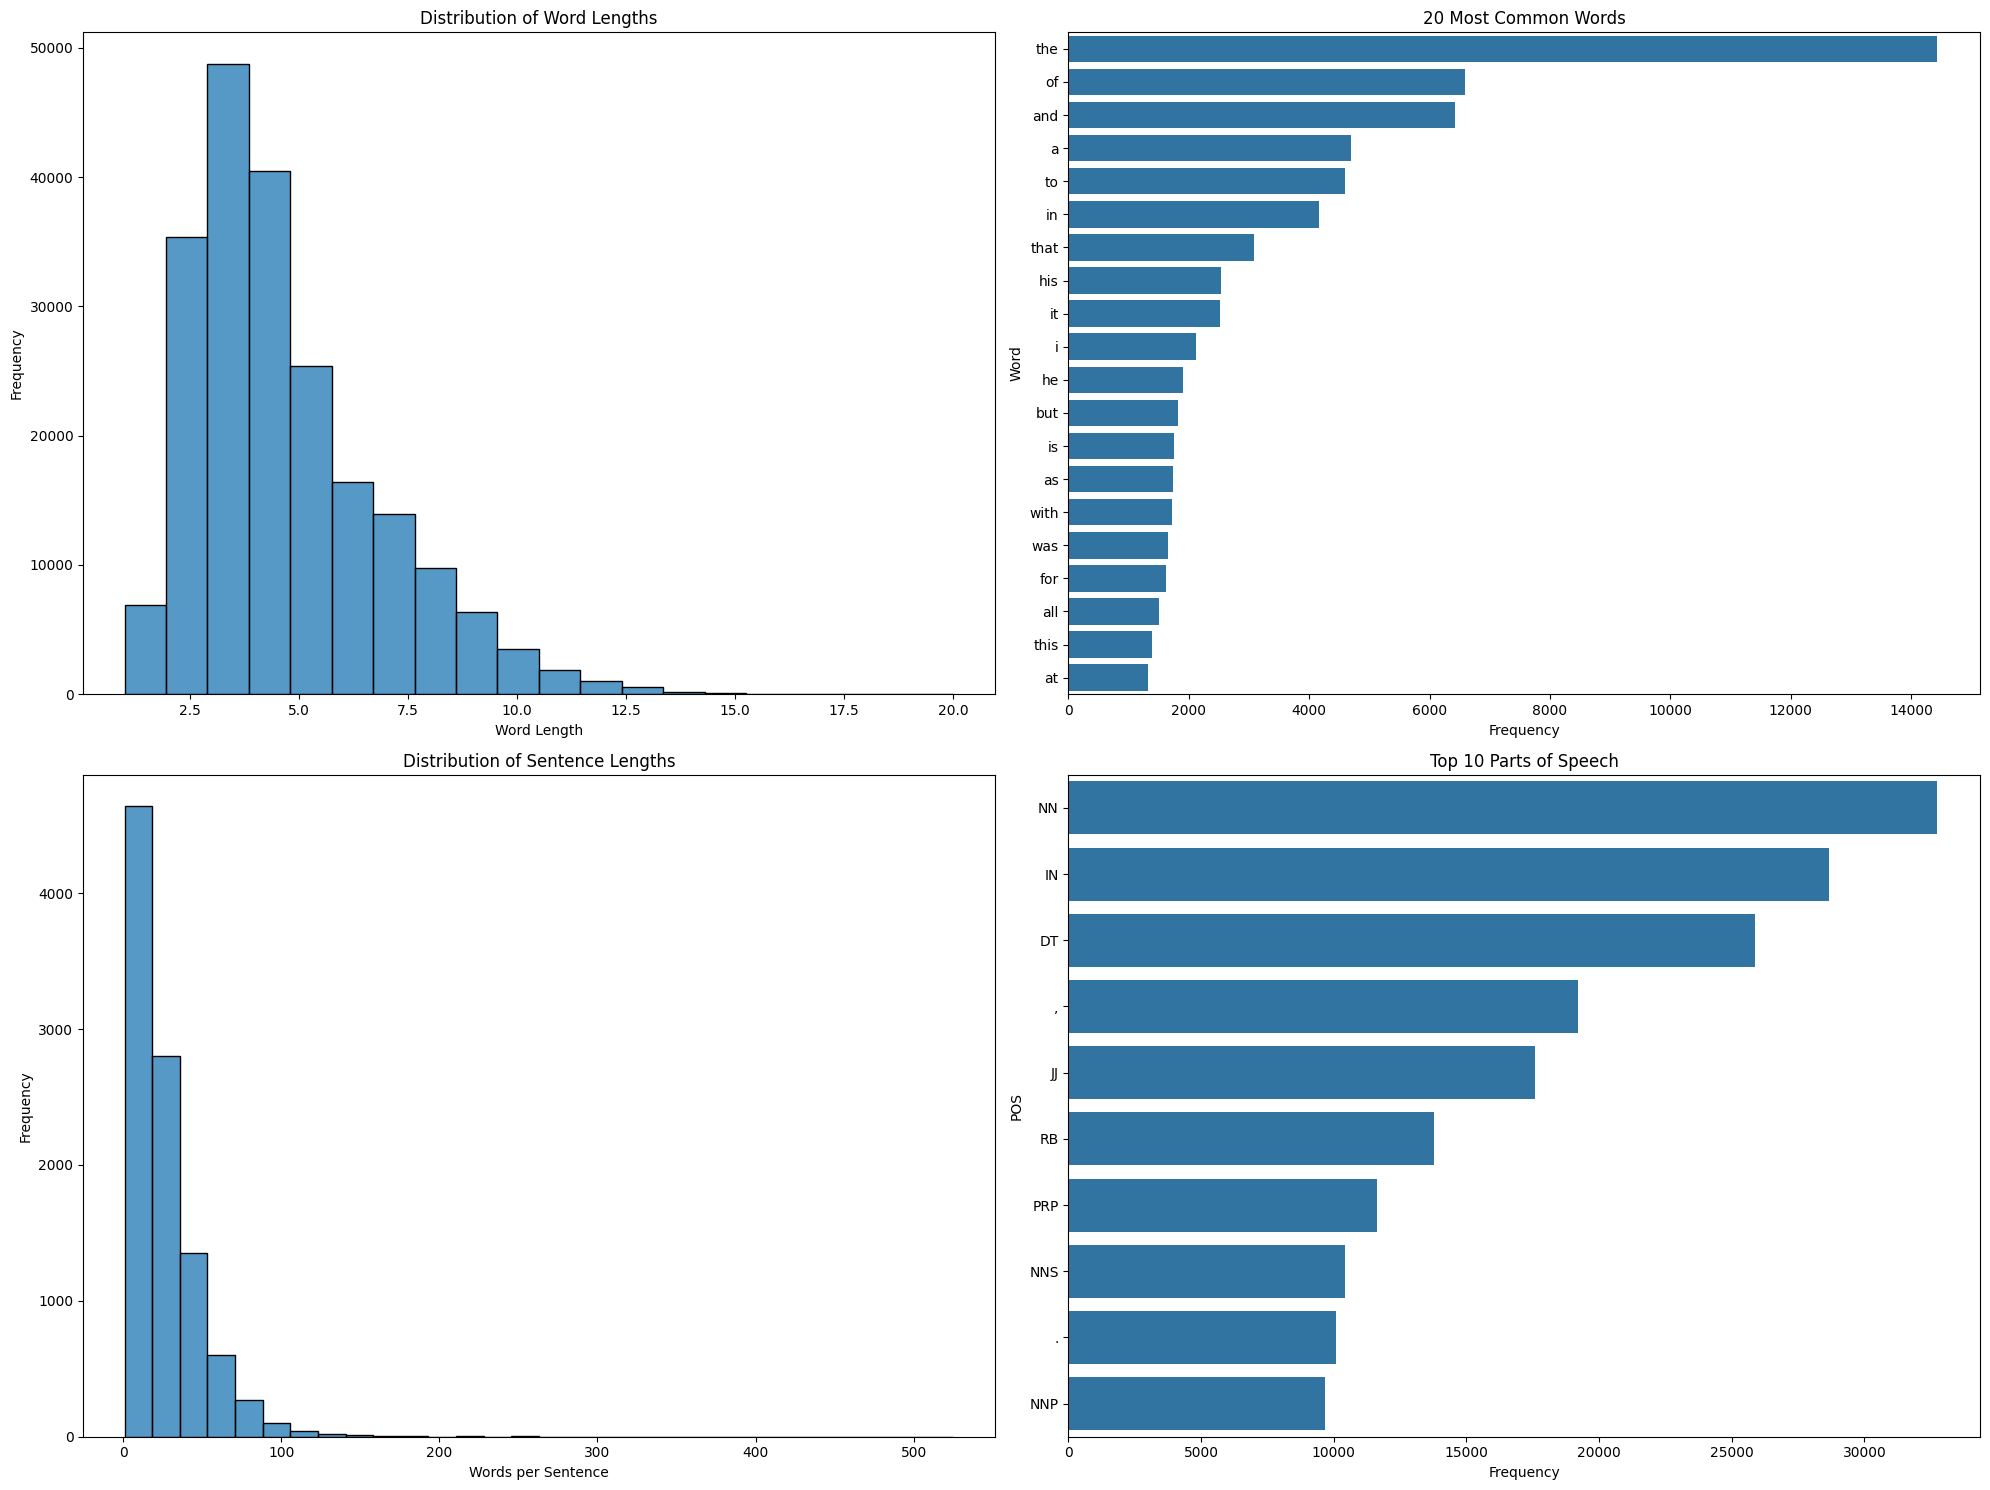

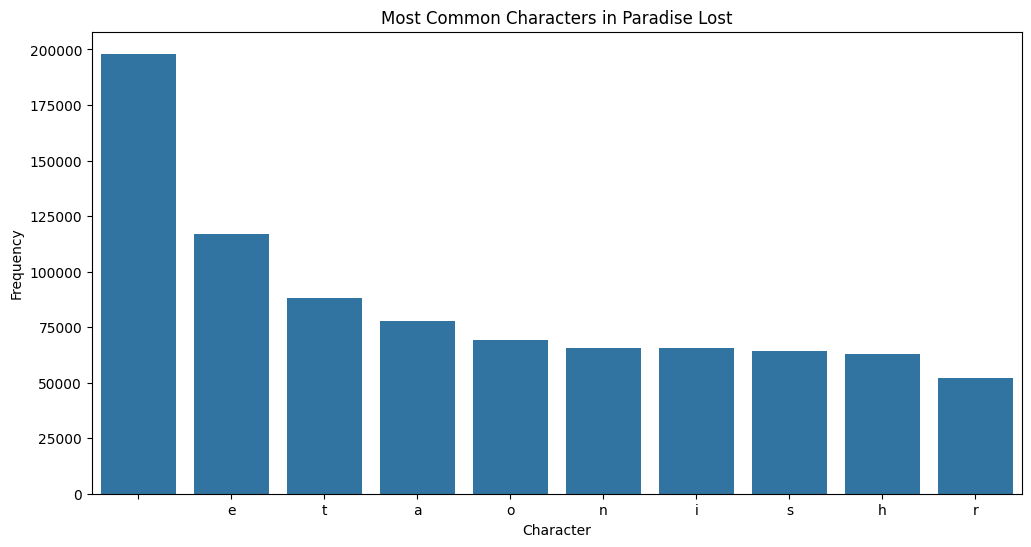

In [12]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import gutenberg
from nltk.probability import FreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# download required data: you probably already did this in a previous problem
nltk.download('gutenberg')
# error on first run install this
nltk.download('averaged_perceptron_tagger_eng')

# Get Paradise Lost text
paradise = gutenberg.raw('melville-moby_dick.txt')

def explore_text_with_viz(text):
    """
    Perform exploratory analysis with visualizations
    """
    # tokenize
    words = word_tokenize(text)
    sentences = sent_tokenize(text)
    
    fig = plt.figure(figsize=(20, 15))
    
    # 1. word Length Distribution
    plt.subplot(2, 2, 1)
    word_lengths = [len(word) for word in words if word.isalnum()]
    sns.histplot(word_lengths, bins=20)
    plt.title('Distribution of Word Lengths')
    plt.xlabel('Word Length')
    plt.ylabel('Frequency')
    
    # 2. most Common Words
    plt.subplot(2, 2, 2)
    word_freq = FreqDist(word.lower() for word in words if word.isalnum())
    word_freq_df = pd.DataFrame(word_freq.most_common(20), 
                               columns=['Word', 'Frequency'])
    sns.barplot(data=word_freq_df, x='Frequency', y='Word')
    plt.title('20 Most Common Words')
    
    # 3. sentence Length Distribution
    plt.subplot(2, 2, 3)
    sent_lengths = [len(word_tokenize(sent)) for sent in sentences]
    sns.histplot(sent_lengths, bins=30)
    plt.title('Distribution of Sentence Lengths')
    plt.xlabel('Words per Sentence')
    plt.ylabel('Frequency')
    
    # 4. parts of Speech Distribution
    plt.subplot(2, 2, 4)
    pos_tags = nltk.pos_tag(words)
    pos_freq = FreqDist(tag for word, tag in pos_tags)
    pos_df = pd.DataFrame(pos_freq.most_common(10), 
                         columns=['POS', 'Frequency'])
    sns.barplot(data=pos_df, x='Frequency', y='POS')
    plt.title('Top 10 Parts of Speech')
    
    plt.tight_layout()
    
    # additional statistics
    stats = {
        'Total Words': len(words),
        'Unique Words': len(set(word.lower() for word in words if word.isalnum())),
        'Average Word Length': sum(word_lengths) / len(word_lengths),
        'Average Sentence Length': sum(sent_lengths) / len(sent_lengths),
        'Longest Sentence': max(sent_lengths),
        'Most Common Word': word_freq_df.iloc[0]['Word'],
        'Most Common POS': pos_df.iloc[0]['POS']
    }
    
    # Character-level analysis
    char_freq = Counter(text.lower())
    most_common_chars = pd.DataFrame(
        char_freq.most_common(10), 
        columns=['Character', 'Frequency']
    )
    
    return stats, most_common_chars

# Run the analysis
stats, char_freq = explore_text_with_viz(paradise)

# Print statistics
print("\nText Statistics:")
for key, value in stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")

print("\nMost Common Characters:")
print(char_freq)

# Additional visualization for character frequencies
plt.figure(figsize=(12, 6))
sns.barplot(data=char_freq, x='Character', y='Frequency')
plt.title('Most Common Characters in Paradise Lost')
plt.show()

_____

# Problem 4: Feature Engineering (14)

Now we get to the interesting part......

You may have noticed that the word "token" has entered our vocabulary since the wide spread use of chatbots in the past couple of years. Here, we will examine what a token is and why it is important. 

If you pay attention to chatbot news you might have also come across the idea of a "context length".  As you looked at the statistics in the previous problem you might have concluded that statistics of individual letters and words is nearly useless in terms of encoding meaning. However, long combinations of words does embed information. We'll explore that idea as well.

### The Building Blocks: Tokens and N-grams

#### What is Tokenization?
Imagine you're teaching a computer to read. Unlike humans, who naturally recognize words, spaces, and punctuation, computers need explicit rules for breaking text into meaningful pieces. This is where tokenization comes in.

Tokenization is the process of breaking text into individual "tokens" - usually words, but sometimes subwords or even characters. It's like taking a sentence and carefully cutting it into pieces while preserving meaning. For example:

```text
Original: "Don't be afraid, Mr. Smith!"
Basic splitting by space: ["Don't", "be", "afraid,", "Mr.", "Smith!"]
Proper tokenization: ["Do", "n't", "be", "afraid", ",", "Mr.", "Smith", "!"]
```

Why is this tricky? Consider these challenges:
- Contractions (don't, isn't, they're)
- Abbreviations (Mr., Ph.D., U.S.A.)
- Hyphenated words (state-of-the-art)
- Special characters (émigré, über, año)
- URLs and hashtags (https://example.com, #DataScience)

This is why we use specialized tokenizers like NLTK's `word_tokenize()` instead of just splitting on spaces.

#### Understanding N-grams
While individual words are important, meaning often comes from word combinations. N-grams are sequences of n consecutive tokens. The most common are:
- Bigrams (n=2): pairs of consecutive words
- Trigrams (n=3): sequences of three words
- 4-grams, 5-grams, etc.

For example, in the phrase "The quick brown fox":
```text
Bigrams: ["The quick", "quick brown", "brown fox"]
Trigrams: ["The quick brown", "quick brown fox"]
```

N-grams capture patterns like:
- Common phrases ("New York", "in spite of")
- Fixed expressions ("as far as")
- Word associations ("deeply concerned", "highly recommended")

### Understanding the Feature Engineering Code

Below is a code that does feature engineering using these concepts. Let's walk through what this code does. 

#### What This Code Tells Us
The function extracts three types of features:
1. **Filtered Words**: Important words after removing common ones
2. **Common Bigrams**: Most frequent word pairs, showing common phrases
3. **Word Positions**: Where each word appears, revealing text structure



### What will you do? 
1. The code is commented to help you learn it; write a summary in a your own words in a markdown cell to show you understand what it does at a higher level. 
2. Compare n-grams across several texts and comment on your findings. 

Include in your discussion how what you found could impact:

#### Real-World Applications
These features help computers:
- Identify writing style (frequent phrases)
- Detect topics (important word clusters)
- Find text patterns (word positions)
- Understand language structure (common word pairs)

Modern AI systems like chatbots build on these basics by:
- Learning which words commonly appear together
- Understanding typical word sequences
- Recognizing common phrases and expressions
- Mapping relationships between words


### Discussion:
- engineeer_features takes a text string, computes common bigrams, and the index of unique words
- It does not inherently deal with punctuation so I passed my text files through the clean_text() function first
- I also had to switch the 'words_no_stop' variable with 'words' in the function because it was not actually filtering out common words before.
- Compared Moby Dick and Alice in Wonderland, two very different books. Moby Dick is about 10x as long as Alice but they have similar frequencies of ngrams. That might be because Carrol needs to look at thesaurus to find synonyms for 'said'.

In [ ]:
def engineer_features(text):
    """
    Create various text features
    Returns a dictionary of engineered features
    """
    # First, tokenize the text into words
    words = word_tokenize(text.lower())
    # This gives us: ['the', 'quick', 'brown', 'fox', 'jumps']
    
    # Remove common words (stopwords) that often don't carry meaning
    stop_words = set(stopwords.words('english'))  # words like "the", "is", "at", "which"
    words_no_stop = [w for w in words if w not in stop_words]
    # Now we have: ['quick', 'brown', 'fox', 'jumps']
    
    #  ** altered code to use words_no_stop below **

    # Create bigrams using zip to pair adjacent words
    bigrams = list(zip(words_no_stop[:-1], words_no_stop[1:]))
    # This creates: [('the', 'quick'), ('quick', 'brown'), ('brown', 'fox'), ('fox', 'jumps')]
    
    # Track where words appear in the text
    word_positions = {}
    for i, word in enumerate(words_no_stop):
        if word not in word_positions:
            word_positions[word] = []
        word_positions[word].append(i)
    # Creates: {'the': [0], 'quick': [1], 'brown': [2], 'fox': [3], 'jumps': [4]}
    
    return {
        'filtered_words': words_no_stop,
        'common_bigrams': Counter(bigrams).most_common(10),
        'word_positions': word_positions
    }

In [ ]:
whale = gutenberg.raw('melville-moby_dick.txt')
# pass it through clean_text to handle punctuation
whale, issues = clean_text(whale)
whale_features = engineer_features(whale)

whale_features['common_bigrams']
#whale_features['word_positions']

[(('sperm', 'whale'), 141),
 (('white', 'whale'), 88),
 (('moby', 'dick'), 73),
 (('captain', 'ahab'), 61),
 (('old', 'man'), 59),
 (('sperm', 'whales'), 51),
 (('right', 'whale'), 40),
 (('cried', 'ahab'), 31),
 (('captain', 'peleg'), 28),
 (('one', 'hand'), 27)]

In [21]:
alice = gutenberg.raw('carroll-alice.txt')
# pass it through clean_text to handle punctuation
alice, issues = clean_text(alice)
alice_features = engineer_features(alice)

alice_features['common_bigrams']
#whale_features['word_positions']

[(('said', 'alice'), 122),
 (('mock', 'turtle'), 54),
 (('march', 'hare'), 31),
 (('said', 'king'), 29),
 (('thought', 'alice'), 26),
 (('white', 'rabbit'), 22),
 (('said', 'hatter'), 22),
 (('said', 'mock'), 20),
 (('said', 'caterpillar'), 18),
 (('said', 'gryphon'), 18)]